In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn . metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


In [2]:
telecom_churn = pd.read_csv("telecom_churn.csv",index_col=0)
print(telecom_churn.head())

   account_length  area_code  international_plan  voice_mail_plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5        

In [3]:
print(telecom_churn.isnull().sum())

account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


In [4]:
print(telecom_churn.dtypes)

account_length              int64
area_code                   int64
international_plan          int64
voice_mail_plan             int64
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                       int64
dtype: object


In [5]:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(telecom_churn[['total_day_charge', 'total_eve_charge',"total_night_charge","customer_service_calls"]], telecom_churn['churn'], test_size=0.30, random_state=69)


In [7]:
k = 6
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [8]:

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.886


In [9]:

X_train, X_test, y_train, y_test = train_test_split(telecom_churn[['total_day_charge', 'total_eve_charge',"total_night_charge","customer_service_calls"]], telecom_churn['churn'], test_size=0.25, random_state=69)
k = 6
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8800959232613909


In [10]:

X_train, X_test, y_train, y_test = train_test_split(telecom_churn[['total_day_charge', 'total_eve_charge',"total_night_charge","customer_service_calls"]], telecom_churn['churn'], test_size=0.20, random_state=69)
k = 6
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8845577211394303


# Test size 30% give me the most/ best accuracy with a value of 0.886

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
dict_values([0.833, 0.871, 0.886, 0.887, 0.891, 0.886, 0.888, 0.882, 0.889, 0.886, 0.889, 0.889, 0.895, 0.889, 0.894, 0.886, 0.892, 0.886, 0.888, 0.883])


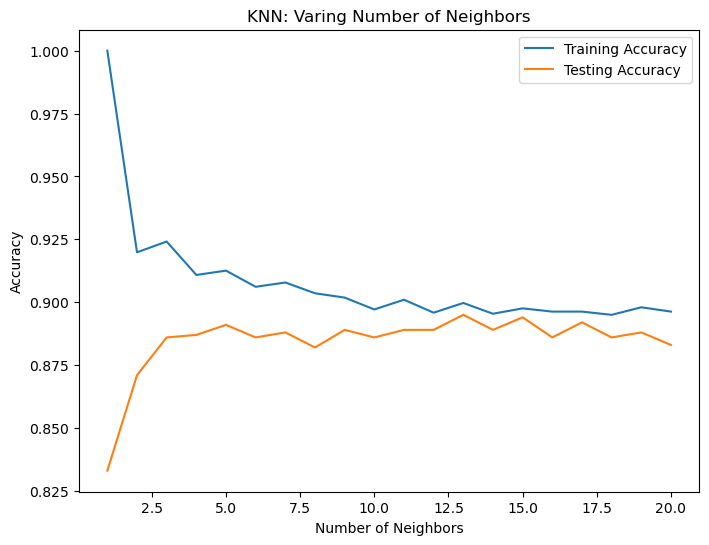

In [11]:
#using 30 percent test size again to valide above statement

X_train, X_test, y_train, y_test = train_test_split(telecom_churn[['total_day_charge', 'total_eve_charge',"total_night_charge","customer_service_calls"]], telecom_churn['churn'], test_size=0.30, random_state=69)
k = 6
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)




train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,21)
print(neighbors)
for neighbor in neighbors:
 knn = KNeighborsClassifier(n_neighbors=neighbor)
 knn.fit(X_train,y_train)
 train_accuracies[neighbor] = knn.score(X_train, y_train)
 test_accuracies[neighbor] = knn.score(X_test, y_test)
#print(train_accuracies.values())
print(test_accuracies.values())
my_train = list(train_accuracies.values())
my_test = list(test_accuracies.values())
plt.figure(figsize=(8,6))
plt.title('KNN: Varing Number of Neighbors')
plt.plot(neighbors, my_train, label='Training Accuracy')
plt.plot(neighbors, my_test, label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# K=13 gives the best accuracy for my model with k value of 0.895 while k= 6 gives 0.886

In [17]:

X_train, X_test, y_train, y_test = train_test_split(telecom_churn[['total_day_charge', 'total_eve_charge',"total_night_charge","customer_service_calls"]], telecom_churn['churn'], test_size=0.30, random_state=69)
k = 13
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)



X_new = np.array([[35.0,17.5,10.1,1],
                 [107.0,19.0,24.1,0],
                 [13.0,10.9,11.2,2],
                 [67.9,45.7,34.5,1]])

y_pred = knn_classifier.predict(X_new)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

      total_day_charge  total_eve_charge  total_night_charge  \
2909             29.60              8.42                9.52   
2438             33.52             20.60                8.64   
2150             38.42             25.89                8.15   
2882             21.17             12.00               12.07   
1161             29.02             15.22               12.69   
...                ...               ...                 ...   
221              28.22             14.83               11.02   
985              58.96             21.21               12.39   
2685             36.30             14.16                5.49   
2271             22.44             19.65               14.10   
179              39.46             24.85                9.05   

      customer_service_calls  
2909                       2  
2438                       2  
2150                       2  
2882                       2  
1161                       3  
...                      ...  
221           

In [21]:
CustName = pd.read_csv("newData.csv")
X_new = CustName
step = 2.5

In [ ]:
# based on predictions, in my opinions , total_day_charge contribute to a churn.